In [1]:
import numpy as np

alldata = np.genfromtxt('ps5.data', usecols = range(15))
np.shape(alldata)

(463, 15)

In [2]:
gdata = np.empty([463, 10])
gdata[:,0] = alldata[:,1]*3600+alldata[:,2]*60+alldata[:,3]
gdata[:,1] = (np.abs(alldata[:,4])*3600+alldata[:,5]*60+alldata[:,6])*np.sign(alldata[:,4])
gdata[:,2:] = alldata[:,7:]
gdata

array([[  2.25000000e+01,   1.42184000e+05,   8.20000000e+00, ...,
          9.99900000e+01,   9.99900000e+01,   9.99900000e+01],
       [  1.18100000e+02,  -5.56590000e+04,   9.20000000e-01, ...,
          5.00000000e-02,   1.23500000e+01,   3.00000000e-02],
       [  3.31800000e+02,  -1.01153000e+05,   1.04000000e+01, ...,
          5.00000000e-02,   1.58200000e+01,   4.00000000e-02],
       ..., 
       [  5.00735000e+04,   1.52750000e+04,   2.59000000e+00, ...,
          1.20000000e-01,   1.85400000e+01,   1.10000000e-01],
       [  5.84279000e+04,   1.95736000e+05,   1.93000000e+00, ...,
          9.99900000e+01,   1.91100000e+01,   6.00000000e-02],
       [  8.55340000e+04,   1.39384000e+05,   2.54000000e+00, ...,
          6.00000000e-02,   1.70000000e+01,   4.00000000e-02]])

In [10]:
import fsps
import matplotlib.pyplot as plt
%matplotlib inline

sp = fsps.StellarPopulation(imf_type = 2, zmet = 6., sfh = 1, tau= 100., const = 1)
mags1 = sp.get_mags(tage= 0, bands='b')[0] # this is for just a stellar mass of 1 solar mass since that is how SFR works in this FSPS fantasyland
print(mags1)

masses = np.logspace(0,6, 1000)
magsall = mags1+np.log10(masses)*(-2.5) # each decade decreases 2.5 mags

[ 13.29673563]


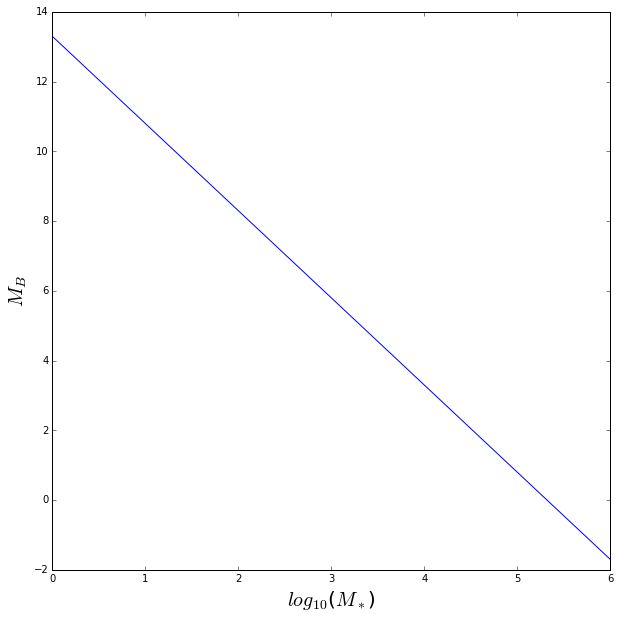

In [11]:
plt.figure(figsize=(10,10))
plt.plot(np.log10(masses), magsall)
plt.xlabel('$log_{10}$($M_*$)',fontsize = 20)
plt.ylabel('$M_B$',fontsize = 20)

In [12]:
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(np.log10(masses), magsall)
print(slope, intercept)

# magsall = a*logmasses + mag[0]

-2.5 13.2967356314


In [1]:
# as for the uncertainties, .1 mags in M_B
# mag + .1 = mag - 2.5*mass_unc
# mass_unc = .04 in logspace

Relatively bright stars (A or B maybe) will peak in B band, and these stars are not too long lived. They will likely remain in their birth clouds, but their birth clouds will almost definitely be very dusty (hence the birth). Therefore, a significant portion of the original B-band emission will be reprocessed by dust and ISM. Therefore, M_B will usually be an underestimate of the actual M_B. If in fact there are even bigger stars being born then they will wash out the B band peak but the B band emission from these larger stars will likely be even more processed since O stars will drift out of their dusty nests even less. 